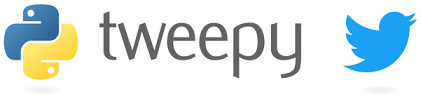

## Ejercicio - Análisis de Twitter con Tweepy y TexBlob

Cargaremos un archivo de texto llamado **segunda_vuelta.csv** conteniendo tweets que resultaron de la busqueada con el hashtag **#fraudeenmesa** del 8 al 14 de junio del 2021.

Realizar las operaciones que se solicitan.

**Nota:** Mayor info sobre el diccionario de datos del objeto "tweet" se describe en: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

### 1. Importación de librerias

In [2]:
import pandas as pd
import numpy as np

### 2. Carga de Tweets

**(a) Cargamos los tweets contenidos en **segunda_vuelta.csv** en un dataframe llamado data**

In [3]:
data = pd.read_csv('segunda_vuelta.csv')


### 3. Análisis de datos

**(b) Observamos las 10 primeras observaciones de data**

In [4]:
# ESCRIBE TU CODIGO AQUI
data.head(10)

,created_at,text,likes,RTs,user_name
0,13/06/2021 23:59,@MarthaChavezC @ONPE_oficial Estas elecciones ...,7.0,3.0,la_charapita
1,13/06/2021 23:58,@DavidU1924 @MarthaChavezC ¡Cuantas actas mas ...,12.0,0.0,DPostigo50
2,13/06/2021 23:54,@ONPE_oficial @alecosta @kennethsanchezg La @O...,1.0,0.0,AleGayoso2
3,13/06/2021 23:46,@JNE_Peru @tuesta @fidh_es PERDIERON CREDIBILI...,0.0,0.0,E062020
4,13/06/2021 23:45,@susanaabad @MarleneChG1 Con el #FraudeEnMesa,0.0,0.0,HILARYCAMPOVER2
5,13/06/2021 23:44,@IndiraHuilca Yo no vi a nadie destilar odio e...,0.0,0.0,TheRealGuille82
6,13/06/2021 23:41,@Tgiusseppe @ONPE_oficial @KeikoFujimori Segur...,1.0,1.0,NANKARINA5
7,13/06/2021 23:39,#fraudeEnMesa una más de las miles fraudulenta...,2.0,1.0,yzarich
8,13/06/2021 23:37,@amariateguibnof Ya es el colmo el pulpo que h...,8.0,4.0,Juaniperezc
9,13/06/2021 23:37,@America24Horas @KeikoFujimori Han anulado act...,0.0,0.0,GabrielOmarPM


**(c) Cuantas observaciones tiene el dataframe llamado data?**

In [5]:
# ESCRIBE TU CODIGO AQUI
len(data.index)

17839

**(d)Que info tiene el conjuno de datos?**

In [6]:
# ESCRIBE TU CODIGO AQUI
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17839 entries, 0 to 17838
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  17838 non-null  object 
 1   text        17839 non-null  object 
 2   likes       17838 non-null  float64
 3   RTs         17838 non-null  float64
 4   user_name   17839 non-null  object 
dtypes: float64(2), object(3)
memory usage: 697.0+ KB


**(e) Cual es el promedio de likes?** 

In [9]:
# ESCRIBE TU CODIGO AQUI
print("Promedio de likes: ", round(data['likes'].mean(), 2))

Promedio de likes:  12.09


**(f) Cual es el promedio de retweets?** 

In [13]:
# ESCRIBE TU CODIGO AQUI
print("Promedio de RTs:", round(data['RTs'].mean(), 2))

Promedio de RTs: 4.88


**(g) Cual es el tweet con más likes y cual el que tiene más retweets?**

In [30]:
# ESCRIBE TU CODIGO AQUI
print(f"Tweet con mas likes: {data['likes'].max()} likes")
print("Indice del Tweet con mas likes: ", data['likes'].idxmax())
print("Usuario: ", data['user_name'][data['likes'].idxmax()])
print(data['text'][data['likes'].idxmax()])

Tweet con mas likes: 5399.0 likes
Indice del Tweet con mas likes:  12505
Usuario:  patriciagamarra
Sí. Perdí las elecciones. Pero saben qué? Lo acepté y no me vieron haciendo berrinche ni gritando #FraudeEnMesa https://t.co/FsuerTSYVO


In [31]:
# ESCRIBE TU CODIGO AQUI
print(f"Tweet con mas retweets: {data['RTs'].max()} retweets")
print("Indice del Tweet con mas RTs: ", data['RTs'].idxmax())
print("Usuario: ", data['user_name'][data['RTs'].idxmax()])
print(data['text'][data['RTs'].idxmax()])

Tweet con mas retweets: 1925.0 retweets
Indice del Tweet con mas RTs:  12490
Usuario:  JulianMaciasT
Keiko y su pack completo trumpista/Atlas Network: Amenaza de golpe, acusaciones de fraude sin prueba, campaña de od… https://t.co/XbyJsKT1Xn


### 4. Visualizaciones

**(a) Crea una serie de tiempo para las columnas 'likes' y "RTs" por separado**

<AxesSubplot:xlabel='created_at'>

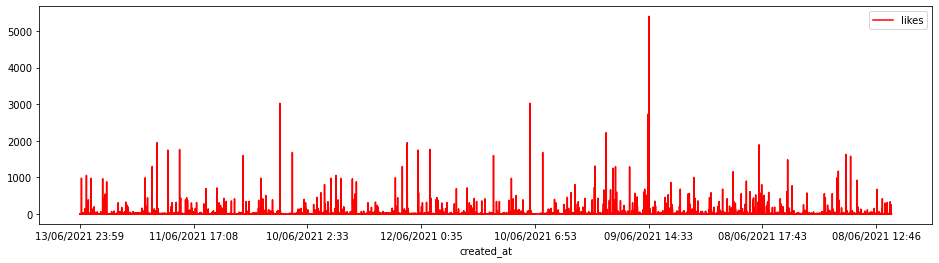

In [39]:
# ESCRIBE TU CODIGO AQUI
data.plot(figsize=(16, 4), x='created_at', y='likes', color = 'r')

<AxesSubplot:title={'center':'Evolucion de los RTs en el tiempo'}, xlabel='created_at'>

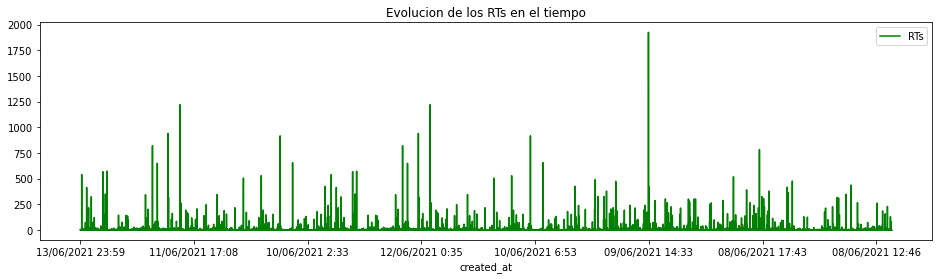

In [37]:
# ESCRIBE TU CODIGO AQUI
data.plot(figsize=(16, 4), x='created_at', y='RTs', color = 'g', title = "Evolucion de los RTs en el tiempo")

**(b) Crea una serie de tiempo para las columnas 'likes' y "RTs" juntos en el mismo grafico**

<AxesSubplot:title={'center':'Evolucion de los likes y RTs en el tiempo'}, xlabel='created_at'>

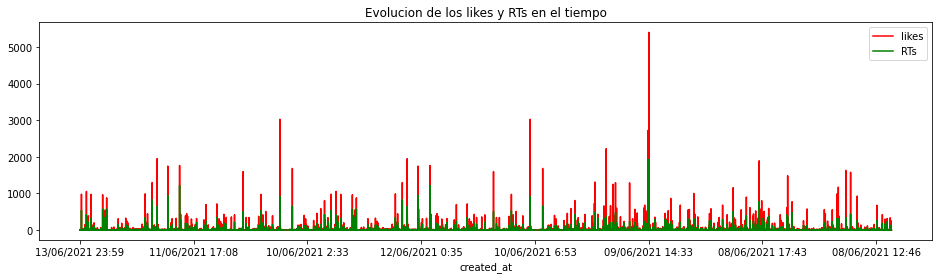

In [43]:
# ESCRIBE TU CODIGO AQUI
data.plot(figsize=(16, 4), x='created_at', y=['likes', 'RTs'], color = ['r', 'g'], title = "Evolucion de los likes y RTs en el tiempo")

### 5. Análisis de Sentimientos

In [44]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Función de utilidad para limpiar el texto de un tweet eliminando
     enlaces y caracteres especiales que utilizan expresiones regulares.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Función de utilidad para clasificar la polaridad de un tweet
     usando textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

**(a) Crea una nueva columna llamada SA (Sentimental Analysis) en el dataframe data y asignale un valor de polaridad utilizando la funcion analize_sentiment()**

In [45]:
# ESCRIBE TU CODIGO AQUI
data['SA'] = data['text'].apply(lambda x: analize_sentiment(x))

**(b) Obten la cantidad total de tweets positivos, neutrales y negativos**

In [48]:
# ESCRIBE TU CODIGO AQUI
print(f"Cantidad de tweets positivos: {data['SA'].value_counts()[1]}")
print(f"Cantidad de tweets neutrales: {data['SA'].value_counts()[0]}")
print(f"Cantidad de tweets negativos: {data['SA'].value_counts()[-1]}")

Cantidad de tweets positivos: 476
Cantidad de tweets neutrales: 17164
Cantidad de tweets negativos: 199


**(c) Obten el % de tweets positivos, neutrales y negativos**

In [56]:
# ESCRIBE TU CODIGO AQUI
print(f"Porcentaje de tweets positivos: {data['SA'].value_counts()[1]/len(data.index)*100}%")
print(f"Porcentaje de tweets neutrales: {data['SA'].value_counts()[0]/len(data.index)*100}%")
print(f"Porcentaje de tweets negativos: {data['SA'].value_counts()[-1]/len(data.index)*100}%")

Porcentaje de tweets positivos: 2.6683110039800435%
Porcentaje de tweets neutrales: 96.21615561410393%
Porcentaje de tweets negativos: 1.1155333819160267%


Que opinas de los RESULTADOS obtenidos?  LOS PERUANOS SOMOS NEUTRALES?

## Buen trabajo!